In [46]:
%matplotlib inline
from pandas import *
from ggplot import *
import time
import numpy as np
import datetime
import matplotlib.pyplot as plt

# 4.1 Get the mean hourly entries of days. The first 10 station will be compared.
def plot_weather_data(df):
    # select 10 stations as sample
    selected_subway_station = ['R001','R002','R003','R004','R005','R006','R007','R008','R009','R010']
    
    # choose the data of 10 stations
    df = df[df['UNIT'].isin(selected_subway_station)][['Hour','ENTRIESn_hourly','UNIT']]
    
    # Get the total entries of each station at different times
    df = df.groupby(['UNIT','Hour']).mean()
    
    # Reset the index
    df.reset_index(inplace = True)
    
    # Get the mean hourly entries 
    # df['ENTRIESn_hourly_mean'] = df['ENTRIESn_hourly'] / number_of_days
    plot = ggplot(aes(x='Hour',y='ENTRIESn_hourly',color='UNIT'),data=df) + \
           geom_point() + \
           geom_line() + \
           ggtitle("Ridership by time-of-day") + \
           xlab("Hours") + ylab("Hourly Entries") + \
           xlim(0,24) + ylim(0,9000)
    return plot

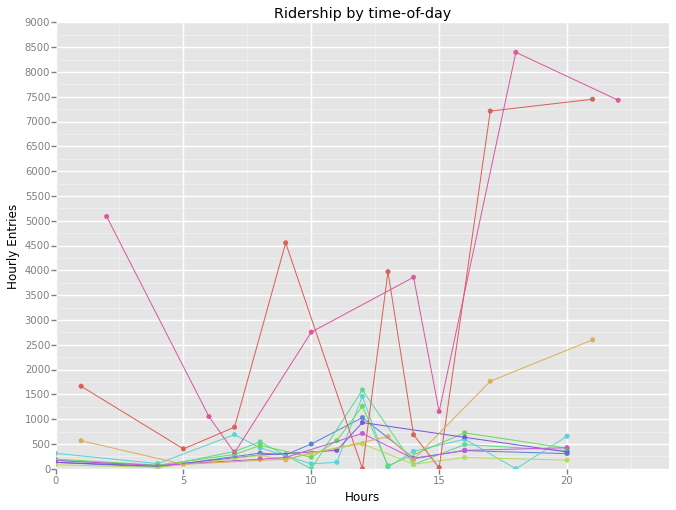

<ggplot: (295687625)>

In [47]:
df = read_csv("turnstile_data_master_with_weather.csv")
plot_weather_data(df)

In [49]:
# 4.2 
def plot_weather_data2(df):
    # Select 10 stations to compare
    selected_subway_station = ['R001','R002','R003','R004','R005','R006','R007','R008','R009','R010']
    
    # Choose the data of 10 stations
    df = df[df['UNIT'].isin(selected_subway_station)][['UNIT','DATEn','ENTRIESn_hourly']]
    
    # Get the sum entries of each day 
    df = df.groupby(['UNIT','DATEn']).sum()
    
    # Reset index of dataframe
    df.reset_index(inplace = True)
    
    # Add a new column of weekday 
    df['weekday'] = df['DATEn'].apply(lambda x: datetime.datetime.strptime(x,'%Y-%m-%d').weekday()+1)
    
    # Delete column of date
    del df['DATEn']
    
    # Get the mean daily entries of weekdays
    df = df.groupby(['UNIT','weekday']).mean()
    df.reset_index(inplace = True)
    plot = ggplot(aes(x='weekday',y='ENTRIESn_hourly',color='UNIT'), data=df) + \
           geom_point() + \
           geom_line() + \
           ggtitle('Rider by day-of-week') + \
           xlab("Weekdays") + ylab("Daily Entries") + \
           scale_x_continuous(breaks=[1,2,3,4,5,6,7],labels=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]) + \
           xlim(1,7) + ylim(0, 9000)
    return plot

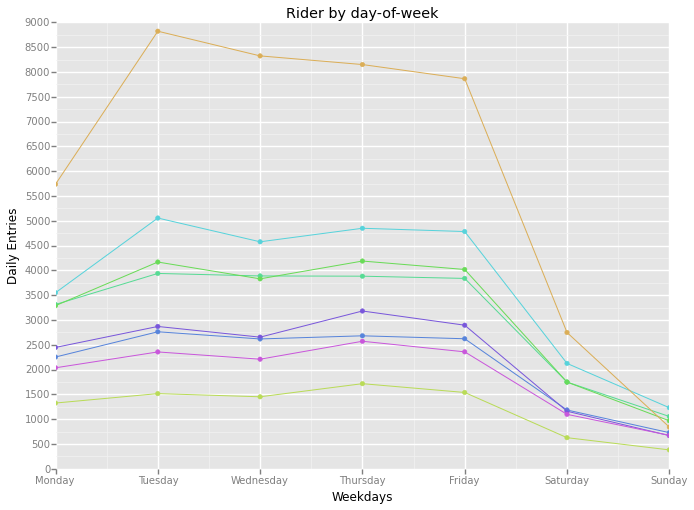

<ggplot: (278412089)>

In [50]:
plot_weather_data2(df)

In [24]:
def entries_histogram(df):
    df = df[df['rain']==1]
    plot = ggplot(aes(x='Hour'), data=df) + \
           geom_histogram()
    return plot


In [30]:
df = read_csv("turnstile_data_master_with_weather.csv")


<module 'matplotlib.pyplot' from '/Users/alan172737/anaconda/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

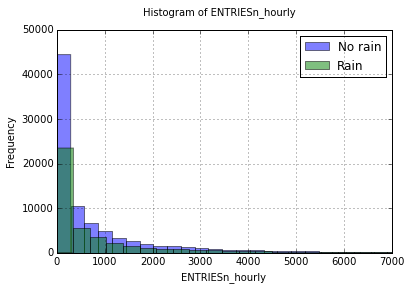

In [44]:
def entries_histogram(turnstile_weather, csv=False):
    '''
    plots two histograms on the same axes to show hourly entries when raining
    vs. when not raining.
    '''
    if csv:
        df = pandas.read_csv(turnstile_weather)
    else:
        df = turnstile_weather

    bins = 150
    alpha = 0.5
    xmin = ymin = 0
    xmax = 7000
    ymax = 50000

    plt.figure()

    df['ENTRIESn_hourly'][df['rain'] == 0].hist(bins=bins, alpha=alpha)
    df['ENTRIESn_hourly'][df['rain'] == 1].hist(bins=bins, alpha=alpha)

    plt.axis([xmin, xmax, ymin, ymax])
    plt.suptitle('Histogram of ENTRIESn_hourly')
    plt.xlabel('ENTRIESn_hourly')
    plt.ylabel('Frequency')
    plt.legend(['No rain', 'Rain'])

    return plt
entries_histogram(df)

In [38]:
df4 = DataFrame({'a': np.random.randn(1000) + 1, 'b': np.random.randn(1000),
                   'c': np.random.randn(1000) - 1}, columns=['a', 'b', 'c'])
print df4

            a         b         c
0    3.123686 -1.024140 -0.358233
1    1.595469  0.890017 -1.882169
2    0.743459  1.034073 -0.854117
3    0.556968 -2.581790 -0.574551
4   -0.201652 -2.607435 -0.137710
5    1.155192  1.413915 -2.271922
6   -0.390872 -1.554806 -0.170756
7   -0.571759  0.257735 -0.745945
8    0.224552 -0.167199  0.078970
9    0.970524 -1.211522  0.415843
10   0.223540  0.167118 -0.857597
11   0.784729  1.057973  0.517178
12   1.993149 -1.123063  0.113689
13   0.725176 -0.031803 -1.827999
14   0.396958 -0.503201 -1.567442
15   0.661526  0.420284 -2.913887
16   0.467835  0.446350 -1.704922
17   0.397993 -1.045053  0.164607
18   0.699775  1.144325 -1.004327
19   1.371149  0.951307 -1.163134
20  -0.223759 -0.485430 -0.465551
21   1.570940  0.549726 -0.990961
22   1.427471 -0.330805 -1.422058
23   1.273965 -0.160018 -0.611474
24   0.557254  0.252643 -0.553624
25  -0.082163  0.752157  0.555251
26   3.181326  0.398467 -0.091374
27   0.151974 -0.216286 -0.655270
28  -0.692475 